In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\jazzy_d.csv')

In [11]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

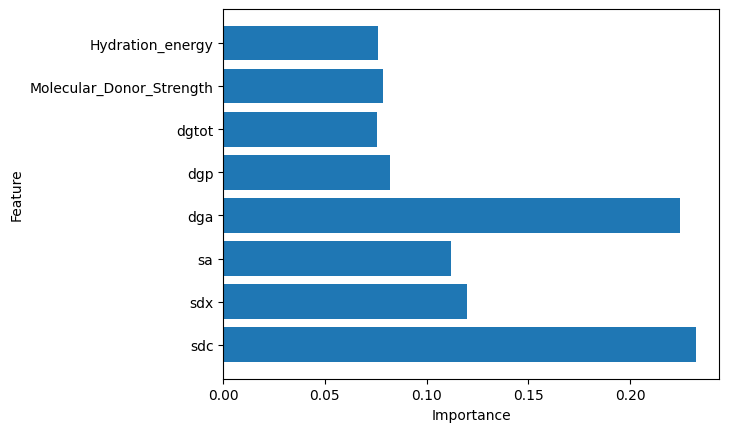

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

df["Kcat"] = np.log10(df["Kcat"])

X = df.drop(["Kcat"], axis=1)
y = df['Kcat']

# Split data

feature_names = X.columns.tolist()

# Train a random forest regressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

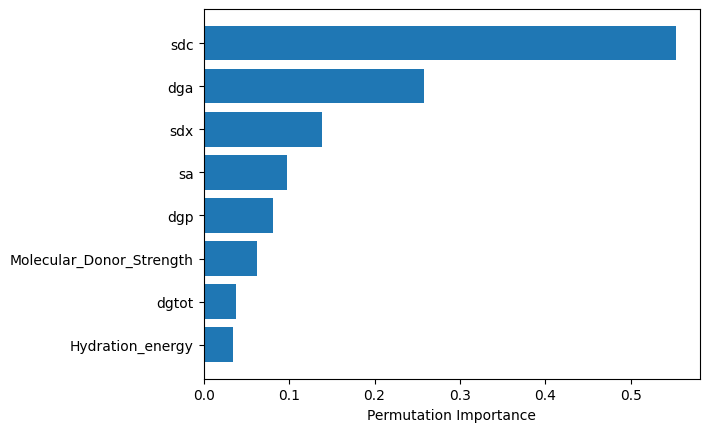

In [18]:
from sklearn.inspection import permutation_importance

# Assuming `model` is already trained on your data
result = permutation_importance(model, X, y, n_repeats=30)
sorted_idx = result.importances_mean.argsort()

# Plot
plt.barh([feature_names[i] for i in sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()

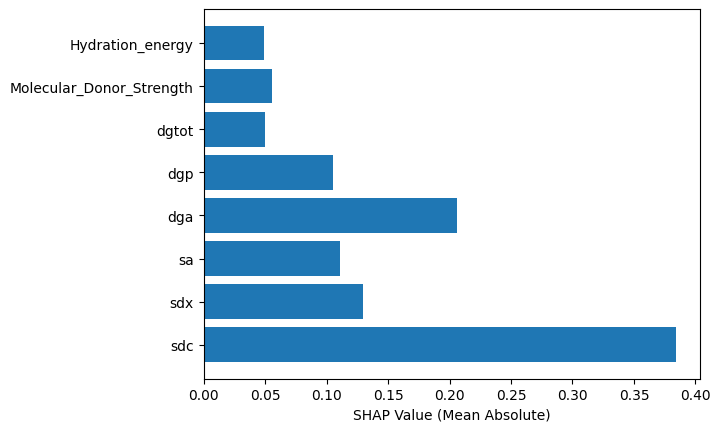

In [19]:
import shap
import numpy as np

# Train a random forest regressor (assuming X and y are your data)
model = RandomForestRegressor(n_estimators=100).fit(X, y)

# Create a tree explainer and calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Sum the SHAP values over all samples to get an overall importance
global_shap_values = np.abs(shap_values).mean(axis=0)

# Plot
plt.barh(feature_names, global_shap_values)
plt.xlabel('SHAP Value (Mean Absolute)')
plt.show()